In [1]:
%pwd

'/content'

In [2]:
# /content/drive/MyDrive/Add in Edu 2024/archive.zip

In [3]:
!unzip -qq "/content/drive/MyDrive/Add in Edu 2024/archive.zip"

In [27]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
path = '/content/Face Mask Dataset/'
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in os.listdir(path):
  for status in os.listdir(path + "/" + where):
    for image in glob.glob(path + where + '/' + status + '/' + '*.png'):
      dataset["image_path"].append(image)
      dataset["mask_status"].append(status)
      dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
1,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
2,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
3,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
4,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train


With Mask: 5909
Without Mask: 5883


<ipython-input-29-6726be2ca281>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset["mask_status"], palette='CMRmap');


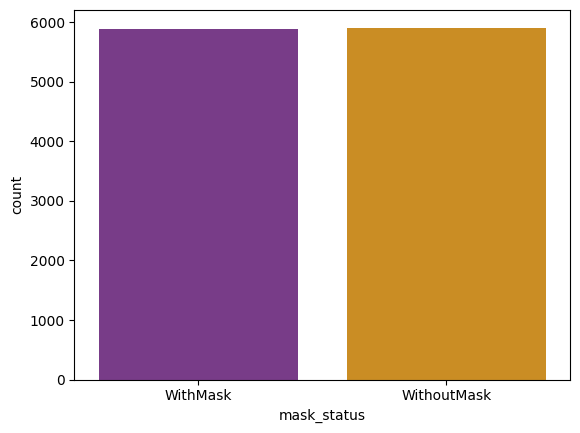

In [29]:
print(f"With Mask:", dataset.value_counts("mask_status")[0])
print(f"Without Mask:", dataset.value_counts("mask_status")[1])

sns.countplot(x=dataset["mask_status"], palette='CMRmap');

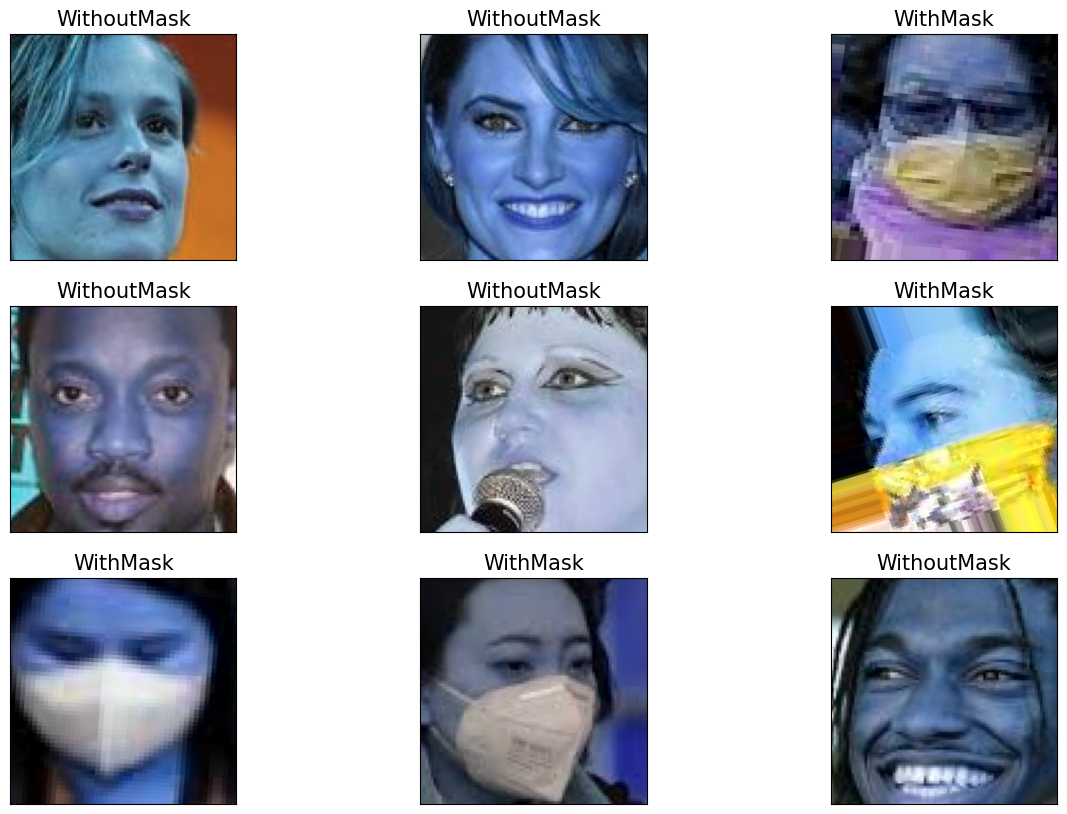

In [31]:
import cv2

plt.figure(figsize=(15,10))

for i in range(9):
  random = np.random.randint(1, len(dataset))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
  plt.title(dataset.loc[random, "mask_status"], size = 15)
  plt.xticks([])
  plt.yticks([])

plt.show()

In [32]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

                                          image_path mask_status  where
0  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
1  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
2  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
3  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
4  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
5  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
6  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
7  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
8  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
9  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train


<ipython-input-33-0013fb4266d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["mask_status"], palette='CMRmap')
<ipython-input-33-0013fb4266d6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_df["mask_status"], palette='CMRmap')
<ipython-input-33-0013fb4266d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=valid_df["mask_status"], palette='CMRmap')


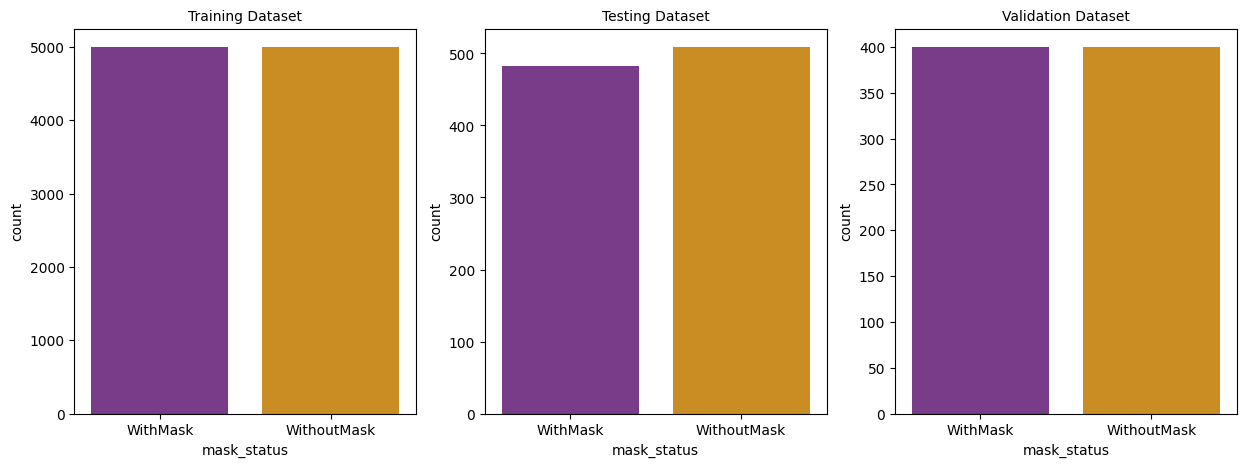

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(x=train_df["mask_status"], palette='CMRmap')
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x=test_df["mask_status"], palette='CMRmap')
plt.title("Testing Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x=valid_df["mask_status"], palette='CMRmap')
plt.title("Validation Dataset", size = 10)

plt.show()

In [34]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
1,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
2,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
3,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
4,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train


In [38]:
data = []
image_size = 150

for i in range(len(train_df)):
  img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

  new_image_array = cv2.resize(img_array, (image_size, image_size))

  label = 1 if train_df["mask_status"][i] == "WithMask" else 0

  data.append([new_image_array, label])


In [39]:
type(data)

list

In [41]:
np.random.shuffle(data)

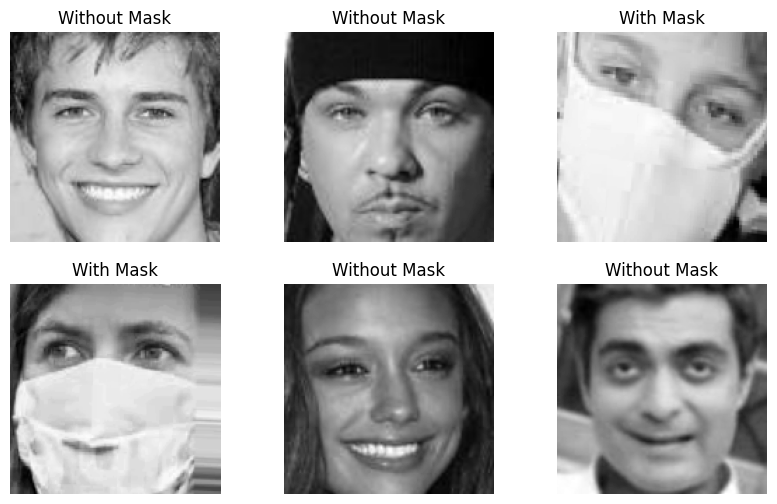

In [42]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for row in range(2):
  for col in range(3):
    image_index = row*100+col

    ax[row, col].axis("off")
    ax[row, col].imshow(data[image_index][0], cmap="gray")

    if data[image_index][1] == 0:
      ax[row, col].set_title("Without Mask")
    else:
      ax[row, col].set_title("With Mask")

plt.show()

In [43]:
data[0]

[array([[ 51,  45,  39, ...,  90, 105, 129],
        [ 56,  46,  36, ...,  95, 105, 115],
        [ 63,  46,  36, ..., 104, 111, 108],
        ...,
        [203, 203, 203, ..., 134, 141, 155],
        [203, 203, 203, ..., 132, 132, 144],
        [204, 204, 204, ..., 138, 129, 132]], dtype=uint8),
 0]

In [44]:
X = []
y = []
for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 13)

In [56]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1,1),
                  padding='same', activation = "relu",
                  input_shape = (150, 150, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 87616)            

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [59]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
250/250 [==============================] - 18s 49ms/step - loss: 27.3766 - accuracy: 0.8986
Epoch 2/5
250/250 [==============================] - 12s 48ms/step - loss: 0.0724 - accuracy: 0.9756
Epoch 3/5
250/250 [==============================] - 12s 48ms/step - loss: 0.0377 - accuracy: 0.9868
Epoch 4/5
250/250 [==============================] - 12s 50ms/step - loss: 0.0166 - accuracy: 0.9935
Epoch 5/5
250/250 [==============================] - 13s 51ms/step - loss: 0.0399 - accuracy: 0.9864


In [60]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 2s 12ms/step - loss: 0.2155 - accuracy: 0.9420


[0.21549031138420105, 0.9419999718666077]

In [62]:
prediction = (model.predict(X_val) > 0.5).astype("int32")

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

63/63 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.94      0.95      0.94      1040

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

[[893  67]
 [ 49 991]]


In [63]:
model2 = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1,1),
                  padding='same', activation = "relu",
                  input_shape = (150, 150, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 87616)            

In [64]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [65]:
X = []
y = []
for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

X = X/255

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 13)

X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model2.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
250/250 [==============================] - 14s 52ms/step - loss: 0.2726 - accuracy: 0.8911
Epoch 2/5
250/250 [==============================] - 13s 52ms/step - loss: 0.0832 - accuracy: 0.9703
Epoch 3/5
250/250 [==============================] - 12s 49ms/step - loss: 0.0513 - accuracy: 0.9801
Epoch 4/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0441 - accuracy: 0.9846
Epoch 5/5
250/250 [==============================] - 12s 46ms/step - loss: 0.0346 - accuracy: 0.9879


In [66]:
model2.evaluate(X_val, y_val)

63/63 [==============================] - 1s 8ms/step - loss: 0.0956 - accuracy: 0.9695


[0.09561631083488464, 0.9695000052452087]

In [67]:
prediction = (model2.predict(X_val) > 0.5).astype("int32")

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

63/63 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       960
           1       0.98      0.96      0.97      1040

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[944  16]
 [ 45 995]]


In [70]:
wrong_result = []

for n in range(len(y_val)):
  if prediction[n] != y_val[n]:
    wrong_result.append(n)

len(wrong_result)

61

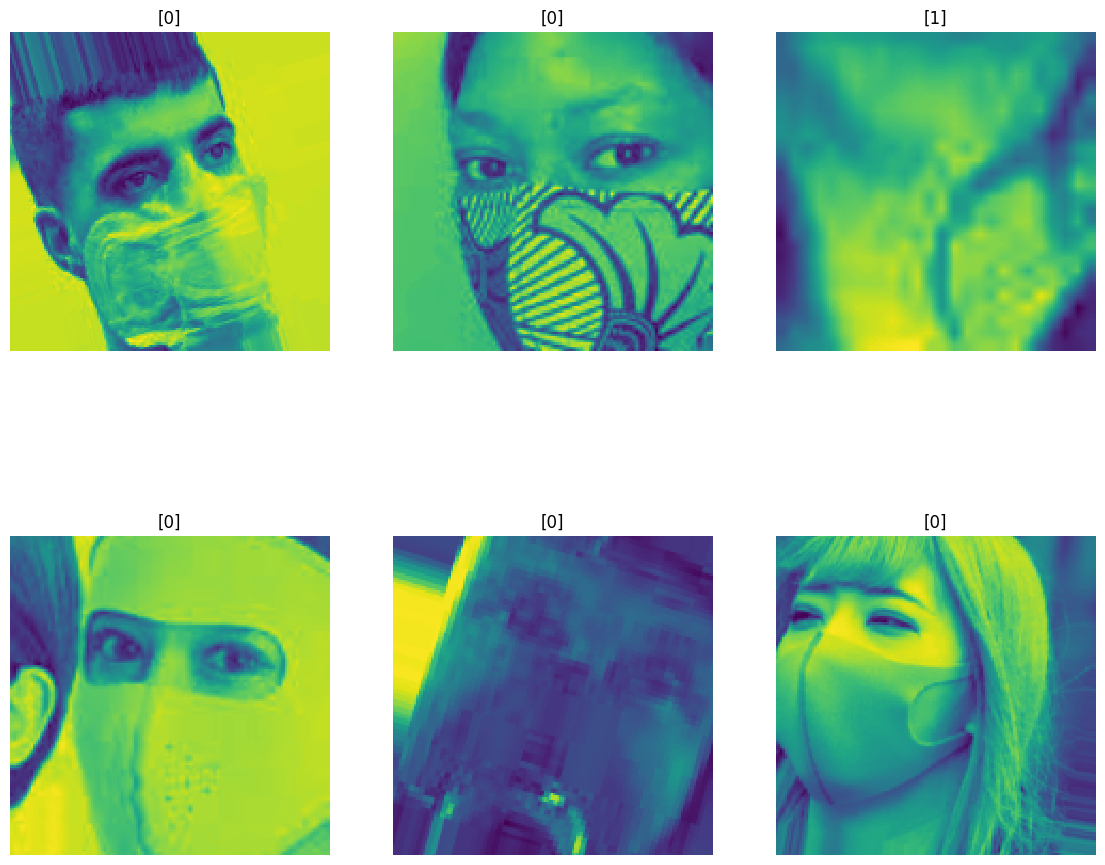

In [72]:
import random

samples = random.choices(population=wrong_result, k = 6)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
  plt.subplot(2,3,idx+1)
  plt.imshow(X_val[n].reshape(150,150), interpolation='nearest')
  plt.title(prediction[n])
  plt.axis('off')

plt.show()

In [73]:
model.save('Mask_OnOff_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
model2.save('Mask_OnOff_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
